## Part 1 - Data Analysis and Bayes Nets

### 1) Data Visualization and Exploration

Importing the required libraries and checking for the python version.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3,5)

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
# Common imports
import numpy as np
import pandas as pd
import os
import cv2  # OpenCV Python library for computer vision

# to make this notebook's output stable across runs
np.random.seed(42)

In [4]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
import random

Loading only the training set for Part 1 of the coursework

In [7]:
CW_DATASET_PATH = "CW_dataset"

def load_train_data(dataset_path=CW_DATASET_PATH):
    x_train_all_path = os.path.join(dataset_path, "x_train_all.csv")
    y_train_all_path = os.path.join(dataset_path, "y_train_all.csv")

    x_train_all = pd.read_csv(x_train_all_path)
    y_train_all = pd.read_csv(y_train_all_path)

    return x_train_all, y_train_all

In [8]:
x_train, y_train = load_train_data()

Analysing the dataset

In [9]:
#Checking the shape of the data
x_train.shape

(9690, 2304)

In [10]:
y_train.shape

(9690, 1)

In [11]:
#Displaying the first 5 rows of the dataset
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,87.0,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,96.0,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,98.0,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,112.0,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,100.0,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0


In [12]:
y_train.head()

,0
0,0
1,0
2,0
3,0
4,0


In [13]:
#Checking for missing values
x_train.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of           0      1      2      3      4      5      6      7      8      9  \
0     False  False  False  False  False  False  False  False  False  False   
1     False  False  False  False  False  False  False  False  False  False   
2     False  False  False  False  False  False  False  False  False  False   
3     False  False  False  False  False  False  False  False  False  False   
4     False  False  False  False  False  False  False  False  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685  False  False  False  False  False  False  False  False  False  False   
9686  False  False  False  False  False  False  False  False  False  False   
9687  False  False  False  False  False  False  False  False  False  False   
9688  False  False  False  False  False  False  False  False  False  False   
9689  False  False  False  False  False  False  False  False  False  False   

 

In [14]:
y_train.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of           0
0     False
1     False
2     False
3     False
4     False
...     ...
9685  False
9686  False
9687  False
9688  False
9689  False

[9690 rows x 1 columns]>

In [15]:
#To check if there are any missing values in the data frame
x_train.isna().any().any()

False

In [16]:
y_train.isna().any().any()

False

In [17]:
# Get a summary of the dataset using describe
x_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
count,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,...,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.00000,9690.000000,9690.000000,9690.000000
mean,89.658514,89.545201,89.343756,89.566770,89.812590,89.853251,89.883282,89.978431,90.170175,90.519092,...,72.234881,71.833437,71.394118,70.572136,69.660165,68.878638,68.29453,67.831889,67.548297,67.393189
std,77.521341,77.430539,77.350452,77.498754,77.437292,77.279125,77.085714,77.081732,77.062371,77.155644,...,65.369022,65.439225,65.402298,65.144238,64.885963,64.530366,64.27455,63.799350,63.437102,63.506304
min,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.00000,5.000000,4.000000,4.000000
25%,32.000000,32.000000,32.000000,31.000000,32.000000,32.000000,32.000000,33.000000,33.000000,33.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,25.000000,25.00000,25.000000,25.000000,25.000000
50%,57.000000,58.000000,57.000000,58.000000,58.000000,58.000000,58.000000,58.000000,59.000000,59.000000,...,46.000000,46.000000,46.000000,45.000000,45.000000,44.000000,44.00000,43.000000,43.000000,43.000000
75%,126.000000,124.000000,122.750000,123.000000,125.000000,123.750000,124.000000,124.000000,124.000000,126.000000,...,95.000000,93.000000,91.000000,88.000000,86.000000,84.000000,82.00000,82.000000,81.000000,81.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000


In [18]:
y_train.describe()

,0
count,9690.000000
mean,3.148607
std,2.177158
min,0.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,9.000000


In [19]:
label_counts = y_train['0'].value_counts().sort_index()
label_counts

0     210
1    2220
2    2250
3    1410
4    1980
5     210
6     360
7     240
8     540
9     270
Name: 0, dtype: int64

Visualising the dataset using graphs

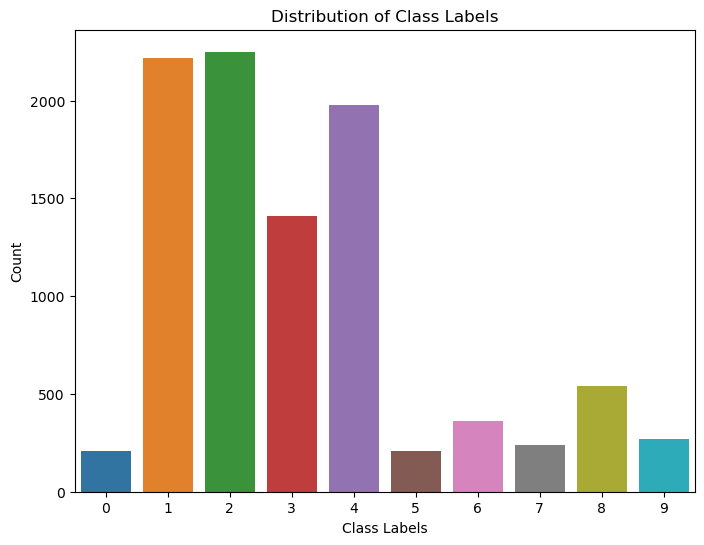

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='0', data=y_train)
plt.title("Distribution of Class Labels")
plt.xlabel("Class Labels")
plt.ylabel("Count")
plt.show()

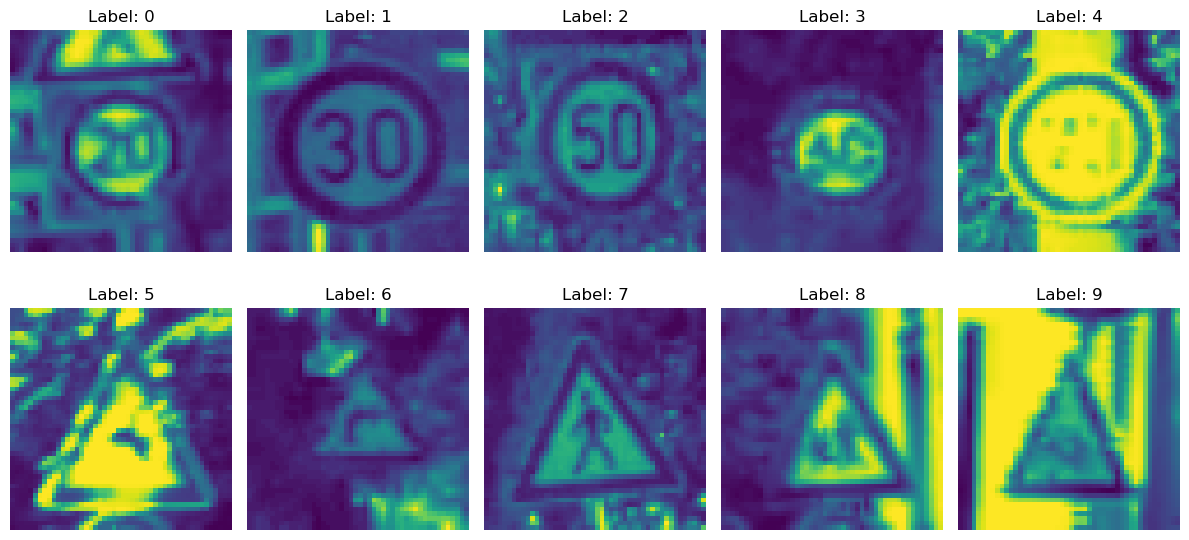

In [21]:
# To display one image for each label

# Initialize a dictionary to store one image for each label
label_images = {}

# Iterate through the rows of the DataFrames and find one image for each label
for index, row in x_train.iterrows():
    label = y_train.iloc[index, 0]  
    
    if label not in label_images:
        # Store the first image for each unique label
        label_images[label] = row.values.reshape(48, 48)  
    
    # Break the loop if we have found one image for each unique label
    if len(label_images) == 10:
        break

# Display the images
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
for i, (label, image) in enumerate(label_images.items()):
    r, c = divmod(i, 5)
    axs[r, c].imshow(image)
    axs[r, c].set_title(f'Label: {label}')
    axs[r, c].axis('off')

plt.tight_layout()
plt.show()

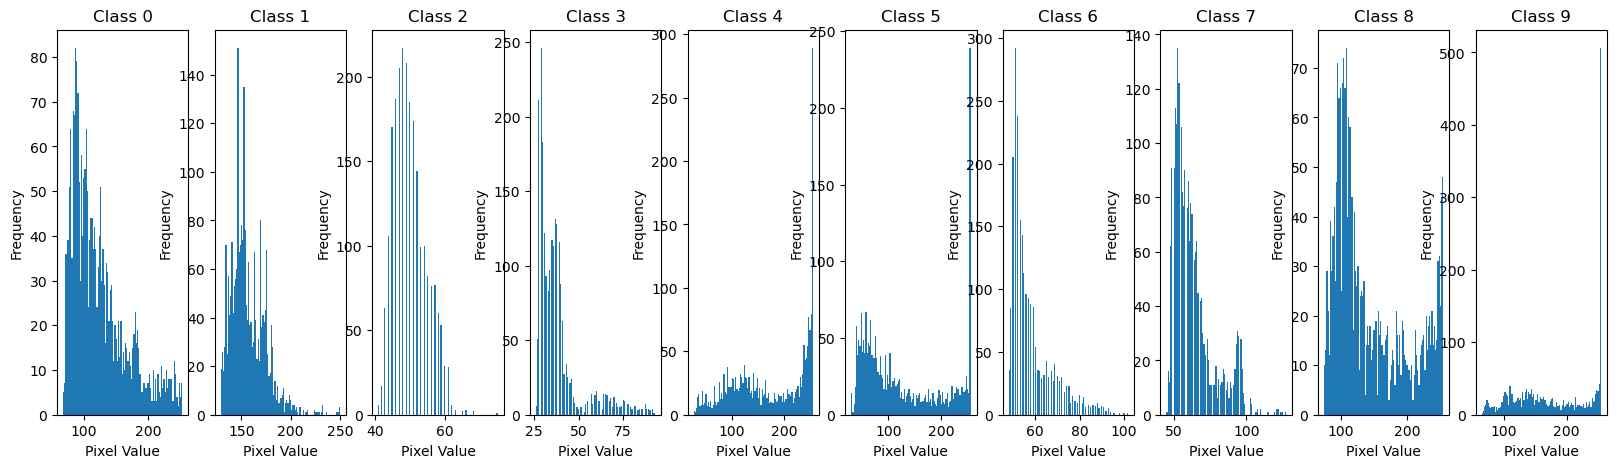

In [22]:
import matplotlib.pyplot as plt

unique_class_labels = y_train['0'].unique()

fig, axes = plt.subplots(1, len(unique_class_labels), figsize=(20, 5))

for i, class_label in enumerate(unique_class_labels):
    # Select a representative image for each class
    class_images = x_train[y_train['0'] == class_label]
    
    if not class_images.empty:
        representative_image = class_images.iloc[0, :-1].values
        
        # Plot the histogram for the representative image of each class
        axes[i].hist(representative_image, bins=100)
        axes[i].set_title(f'Class {class_label}')
        axes[i].set_xlabel("Pixel Value")
        axes[i].set_ylabel("Frequency")

plt.show()


# Box Plots

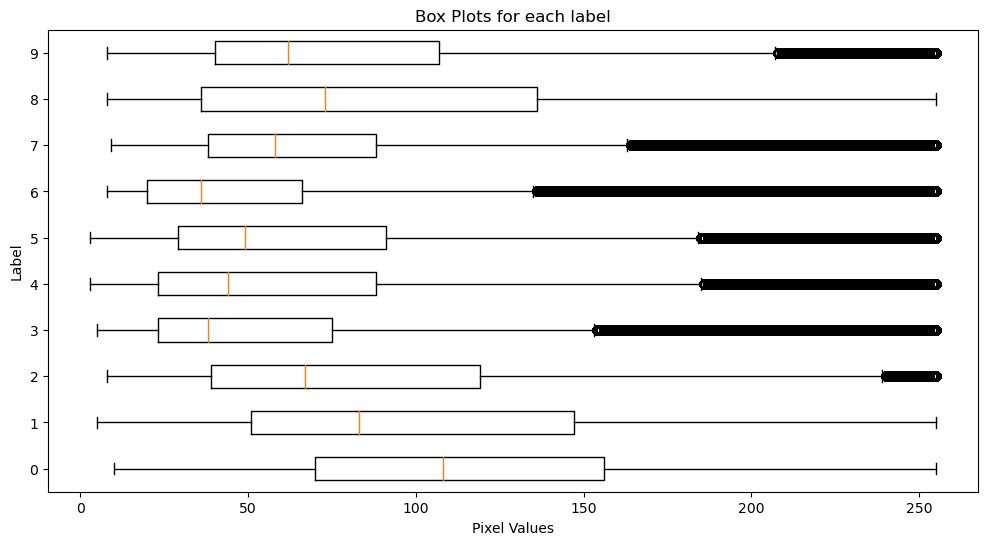

Label 0: 210 images
Label 1: 2220 images
Label 2: 2250 images
Label 3: 1410 images
Label 4: 1980 images
Label 5: 210 images
Label 6: 360 images
Label 7: 240 images
Label 8: 540 images
Label 9: 270 images


In [23]:
# store image data for each label
label_images = {}

# just to check if all images are being plotted
num_images_per_label = {}

for index, row in x_train.iterrows():
    label = y_train.iloc[index, 0]  
    image_data = row.values.reshape(-1, 48, 48) 

    if label not in label_images:
        label_images[label] = []
    
    # add image data to associated labels
    label_images[label].append(image_data)

    # just to check if all images are being plotted
    num_images_per_label[label] = len(label_images[label])

# get numpy array from dictionary values (image data)
box_data = np.array(list(label_images.values()), dtype=object)

# labels from keys
labels = list(label_images.keys())

# box plots for each label 
plt.figure(figsize=(12, 6))
plt.boxplot(box_data, labels=labels, vert=False)
plt.title("Box Plots for each label")
plt.xlabel("Pixel Values")
plt.ylabel("Label")
plt.show()


# just to check if all images are being plotted
for label, num_images in num_images_per_label.items():
    print(f"Label {label}: {num_images} images")

In [24]:
# Define your less_class_labels
less_class_labels = [0, 5, 6, 7, 8, 9]

# Create an empty list to store the data
data_list = []
for index, row in x_train.iterrows():
    label = y_train.iloc[index, 0]
    image_data = row.values.reshape(48, 48)

    if label in less_class_labels:
        data_list.append((image_data, label))

# Convert the data list to a NumPy array
subset_dataset = np.array(data_list, dtype=object)

# Note: Use dtype=object to allow mixed types (tuples with image data and labels)
print(subset_dataset.shape)
# You can still calculate the number of images per label
num_images_per_label = {label: np.sum(subset_dataset[:, 1] == label) for label in less_class_labels}

for label, num_images in num_images_per_label.items():
    print(f"Label {label}: {num_images} images")



(1830, 2)
Label 0: 210 images
Label 5: 210 images
Label 6: 360 images
Label 7: 240 images
Label 8: 540 images
Label 9: 270 images


# Preprocessing Images

In [25]:
from scipy import stats
from scipy.stats.mstats import winsorize
x_train = np.array(x_train)

# data = np.clip(x_train, 0, 255)  # Adjust the thresholds as needed
# normalized_data = data / 255.0



# Winsorize the data (adjust percentiles as needed)
winsorized_data = winsorize(x_train, limits=[0.05, 0.05])

def normalise(images):
    preprocessed_images = []
    for image in images: 
        if(len(image.shape) == 3):
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        if image.dtype != np.uint8:
            image = image.astype(np.uint8)

        adjusted = cv2.convertScaleAbs(image, alpha=1.7, beta = 90)
        enhanced_image = cv2.equalizeHist(adjusted)
        image = enhanced_image/255.0
        resize = cv2.resize(image, (48,48))

        preprocessed_images.append(resize)
    return  np.array(preprocessed_images)


x_train = normalise(x_train)

x_train = x_train.reshape(x_train.shape[0], -1)
x_train.shape

(9690, 2304)

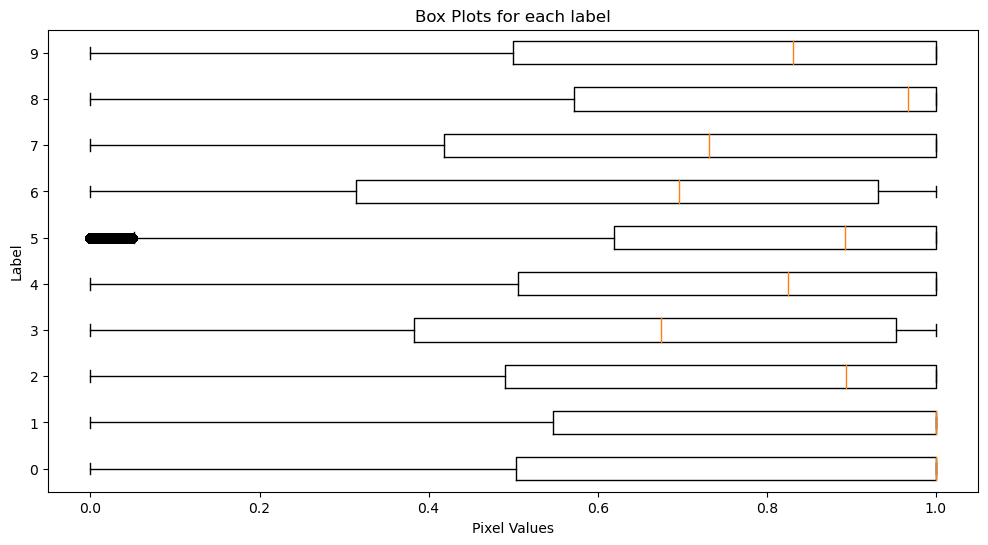

Label 0: 210 images
Label 1: 2220 images
Label 2: 2250 images
Label 3: 1410 images
Label 4: 1980 images
Label 5: 210 images
Label 6: 360 images
Label 7: 240 images
Label 8: 540 images
Label 9: 270 images


In [26]:
# store image data for each label
label_images = {}

# just to check if all images are being plotted
num_images_per_label = {}

x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)

for index, row in x_train.iterrows():
    label = y_train.iloc[index, 0]  
    image_data = row.values.reshape(-1, 48, 48) 

    if label not in label_images:
        label_images[label] = []
    
    # add image data to associated labels
    label_images[label].append(image_data)

    # just to check if all images are being plotted
    num_images_per_label[label] = len(label_images[label])

# get numpy array from dictionary values (image data)
box_data = np.array(list(label_images.values()), dtype=object)

# labels from keys
labels = list(label_images.keys())

# box plots for each label 
plt.figure(figsize=(12, 6))
plt.boxplot(box_data, labels=labels, vert=False)
plt.title("Box Plots for each label")
plt.xlabel("Pixel Values")
plt.ylabel("Label")
plt.show()


# just to check if all images are being plotted
for label, num_images in num_images_per_label.items():
    print(f"Label {label}: {num_images} images")

In [27]:
def add_noise(feature_vector, noise_level=0.01):
    noise = np.random.normal(0, noise_level, feature_vector.shape)
    noisy_vector = feature_vector + noise
    return noisy_vector


In [28]:
def introduce_perturbations(feature_vector, perturbation_level=0.02):
    min_value = np.min(feature_vector)
    max_value = np.max(feature_vector)
    perturbations = np.random.uniform(-perturbation_level, perturbation_level, feature_vector.shape)
    perturbed_vector = feature_vector + perturbations * (max_value - min_value)
    return perturbed_vector


In [29]:
print(x_train.shape)
print(y_train.shape)

augmented_data = []
new_augmented_data = []
labels_for_train = []
for data, label in subset_dataset:
    noisy_vector = add_noise(data, noise_level=0.01)  
    perturbed_vector = introduce_perturbations(data, perturbation_level=0.02)  
    
        # Append the original and augmented data with their respective labels
    augmented_data.append((data, label))
    augmented_data.append((noisy_vector, label))
    augmented_data.append((perturbed_vector, label))

# Convert the appended data to a NumPy array
for image_vectors, label_col in augmented_data:
    new_augmented_data.append(image_vectors)
    labels_for_train.append(label_col)

new_augmented_data = np.array(new_augmented_data)
labels_for_train = np.array(labels_for_train)

new_labels = labels_for_train.reshape(-1, 1)

new_augmented_data = new_augmented_data.reshape(new_augmented_data.shape[0], -1)

print(new_augmented_data.shape)
print(new_labels.shape)
if new_augmented_data.shape[1] == x_train.shape[1]:
    x_train = np.vstack((x_train, new_augmented_data))
    y_train = np.concatenate((y_train, new_labels))
else:
    print("Number of columns in appended_data doesn't match x_train.")

print(x_train.shape)
print(y_train.shape)


(9690, 2304)
(9690, 1)


(5490, 2304)
(5490, 1)
(15180, 2304)
(15180, 1)


In [30]:
rotation_angle = 15
scale_factor = 1.2

rotated_images = []

for image in x_train:
    image = image.reshape(48, 48)  
    rotated_image = cv2.warpAffine(image, cv2.getRotationMatrix2D((image.shape[1] / 2, image.shape[0] / 2), rotation_angle, scale_factor), (image.shape[1], image.shape[0]))
    rotated_images.append(rotated_image)

x_train = np.asarray(rotated_images)

x_train = np.asarray(rotated_images)

x_train = x_train.reshape(x_train.shape[0], -1)
x_train.shape

(15180, 2304)

No pre-processing or normalization was needed because the images in the dataset were already pre-processed (grayscaled and resized) and normalized.

### 2) Running Naïve Bayes Classifier on Dataset

In [31]:

from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV

x_train = np.asarray(x_train)
train_images = x_train.reshape(x_train.shape[0], -1)
y_train = np.asarray(y_train).ravel()

clf = GaussianNB()
clf.fit(x_train, y_train)
# grid_search = GridSearchCV(clf, param_grid, cv=5)  # 5-fold cross-validation
# grid_search.fit(x_train, y_train)
# best_params = grid_search.best_params_
predictions = clf.predict(x_train)

# # Print the best hyperparameters
# print("Best Hyperparameters:")
# for param, value in best_params.items():
#     print(f"{param}: {value}")
"""
#Using the stratified train test split to split the data into train and test sets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
train_images = train_images.reshape(train_images.shape[0], -1)
X_train, X_test, Y_train, Y_test = train_test_split(train_images,y_train,test_size=0.33, random_state=42)
clf2 = GaussianNB()
clf2.fit(X_train, Y_train)
predictions2 = clf2.predict(X_test)
"""

'\n#Using the stratified train test split to split the data into train and test sets\nfrom sklearn.naive_bayes import GaussianNB\nfrom sklearn.model_selection import train_test_split\ntrain_images = train_images.reshape(train_images.shape[0], -1)\nX_train, X_test, Y_train, Y_test = train_test_split(train_images,y_train,test_size=0.33, random_state=42)\nclf2 = GaussianNB()\nclf2.fit(X_train, Y_train)\npredictions2 = clf2.predict(X_test)\n'

#### Evaluation Metrics

In [32]:
from sklearn.metrics import classification_report

report = classification_report(y_train, predictions)

print(report)

              precision    recall  f1-score   support

           0       0.60      0.70      0.65       840
           1       0.37      0.67      0.48      2220
           2       0.32      0.12      0.18      2250
           3       0.26      0.39      0.32      1410
           4       0.46      0.64      0.54      1980
           5       0.69      0.14      0.23       840
           6       0.50      0.43      0.46      1440
           7       0.20      0.38      0.27       960
           8       0.80      0.25      0.38      2160
           9       0.42      0.24      0.30      1080

    accuracy                           0.40     15180
   macro avg       0.46      0.40      0.38     15180
weighted avg       0.46      0.40      0.38     15180



In [33]:
from sklearn.metrics import accuracy_score

# accuracy
accuracy = accuracy_score(y_train, predictions)
print('Accuracy = ', accuracy)

Accuracy =  0.4000658761528327


In [34]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_train, predictions)
confusion_matrix

array([[ 588,  135,    3,   12,   60,    0,    0,   42,    0,    0],
       [   0, 1494,   63,  402,  261,    0,    0,    0,    0,    0],
       [   0, 1109,  272,  466,  403,    0,    0,    0,    0,    0],
       [   0,  344,  135,  553,  378,    0,    0,    0,    0,    0],
       [   0,  427,    3,  289, 1261,    0,    0,    0,    0,    0],
       [  63,   65,  111,    2,   32,  114,  105,  294,   42,   12],
       [   9,   32,  107,  168,   53,    0,  621,  252,   27,  171],
       [  60,   58,   77,   78,   27,    6,  162,  369,    9,  114],
       [ 225,  289,   49,   49,  153,   39,  348,  408,  543,   57],
       [  27,   64,   22,   79,  105,    6,   18,  444,   57,  258]],
      dtype=int64)

In [35]:
tp = confusion_matrix.diagonal()
fn = np.sum(confusion_matrix, axis=1) - tp
fp = np.sum(confusion_matrix, axis=0) - tp
tn = np.sum(confusion_matrix) - (tp + fn + fp)

# TP Rate (Sensitivity or Recall)
tp_rate = tp / (tp + fn)

# FP Rate
fp_rate = fp / (fp + tn)

for class_label, tp, fp in zip(range(len(tp_rate)), tp_rate, fp_rate):
    print(f"Class {class_label}: \nTP Rate = {tp}, \nFP Rate = {fp}")

Class 0: 
TP Rate = 0.7, 
FP Rate = 0.026778242677824266
Class 1: 
TP Rate = 0.672972972972973, 
FP Rate = 0.19467592592592592
Class 2: 
TP Rate = 0.12088888888888889, 
FP Rate = 0.04408352668213457
Class 3: 
TP Rate = 0.3921985815602837, 
FP Rate = 0.11220043572984749
Class 4: 
TP Rate = 0.6368686868686869, 
FP Rate = 0.11151515151515151
Class 5: 
TP Rate = 0.1357142857142857, 
FP Rate = 0.0035564853556485356
Class 6: 
TP Rate = 0.43125, 
FP Rate = 0.04606986899563319
Class 7: 
TP Rate = 0.384375, 
FP Rate = 0.10126582278481013
Class 8: 
TP Rate = 0.2513888888888889, 
FP Rate = 0.010368663594470046
Class 9: 
TP Rate = 0.2388888888888889, 
FP Rate = 0.025106382978723404


In [36]:
specificity = []
unique_labels = np.unique(y_train)

for i in range(len(unique_labels)):
    true_negative = np.sum(confusion_matrix) - np.sum(confusion_matrix[i, :]) - np.sum(confusion_matrix[:, i]) + confusion_matrix[i, i]
    total_negative = np.sum(confusion_matrix) - np.sum(confusion_matrix[i, :])
    print(f'Label {unique_labels[i]} specificity: {true_negative / total_negative}')

Label 0 specificity: 0.9732217573221758
Label 1 specificity: 0.805324074074074
Label 2 specificity: 0.9559164733178654
Label 3 specificity: 0.8877995642701525
Label 4 specificity: 0.8884848484848484
Label 5 specificity: 0.9964435146443514
Label 6 specificity: 0.9539301310043669
Label 7 specificity: 0.8987341772151899
Label 8 specificity: 0.9896313364055299
Label 9 specificity: 0.9748936170212766


In [37]:
from sklearn.metrics import recall_score

sensitivity = recall_score(y_train, predictions, average=None)
for i in range(len(unique_labels)):
    print(f'Label {unique_labels[i]} sensitivity: {sensitivity[i]}')

Label 0 sensitivity: 0.7
Label 1 sensitivity: 0.672972972972973
Label 2 sensitivity: 0.12088888888888889
Label 3 sensitivity: 0.3921985815602837
Label 4 sensitivity: 0.6368686868686869
Label 5 sensitivity: 0.1357142857142857
Label 6 sensitivity: 0.43125
Label 7 sensitivity: 0.384375
Label 8 sensitivity: 0.2513888888888889
Label 9 sensitivity: 0.2388888888888889


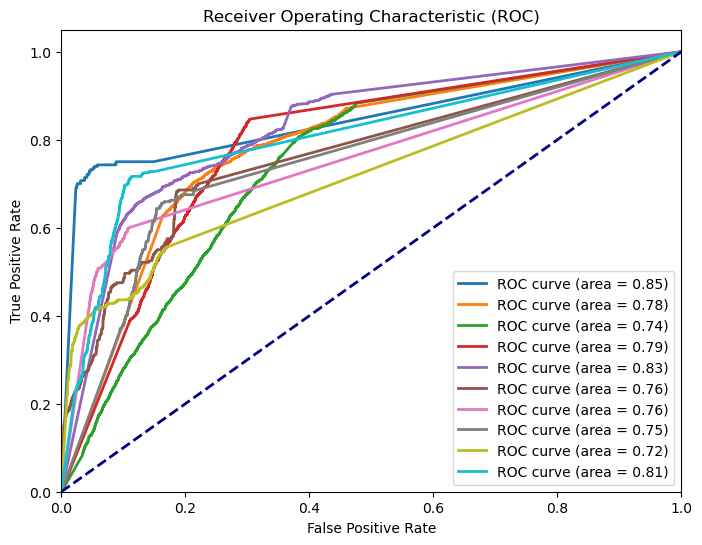

In [38]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

probabilities = clf.predict_proba(x_train)
roc_auc_scores = []
plt.figure(figsize=(8, 6))

for i in range(len(unique_labels)):
    fpr, tpr, _ = roc_curve((y_train == unique_labels[i]).astype(int), probabilities[:, i])
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [39]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, x_train, y_train, scoring="accuracy", cv=10)

In [40]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(scores)

Scores: [0.1969697  0.21607378 0.39920949 0.48418972 0.32938076 0.42555995
 0.22727273 0.32542819 0.39657444 0.39064559]
Mean: 0.33913043478260874
Standard deviation: 0.09285631068640206


In [41]:
scores = cross_val_score(clf, x_train, y_train, scoring="neg_mean_squared_error", cv=10)

clf_rmse_scores = np.sqrt(-scores)

display_scores(clf_rmse_scores)

Scores: [3.70227648 3.44024848 2.98756756 1.66019825 2.19668573 1.8822379
 1.97130268 2.10745587 2.70764788 3.11007966]
Mean: 2.576570049250546
Standard deviation: 0.6735318460002058


In [42]:
# from sklearn.metrics import accuracy_score
# num_folds = 10
# subset_size = len(x_train) // num_folds
# print(subset_size)
# ysubset_size = len(y_train) // num_folds
# print(ysubset_size)
# accuracies = []

# for i in range(num_folds):
#     xtesting_this_round = x_train[i * subset_size: (i + 1) * subset_size]
#     ytesting_this_round = y_train[i * subset_size: (i + 1) * subset_size]

#     if i == 0:
#         xtraining_this_round = x_train[(i + 1) * subset_size:]
#         ytraining_this_round = y_train[(i + 1) * subset_size:]
#     elif i > 0 and i < 10:
#         xtraining_this_round = np.concatenate((x_train[0:i * subset_size], x_train[(i + 1) * subset_size:]))
#         ytraining_this_round = np.concatenate((y_train[0:i * subset_size], y_train[(i + 1) * subset_size:]))
#     elif i == 10:
#         xtraining_this_round = x_train[:i * subset_size]
#         ytraining_this_round = y_train[:i * subset_size]

#     # training_indices = np.r_[0:i * subset_size, (i + 1) * subset_size:]
#     # print("Training indices: ", training_indices)
#     # print(len(training_indices))
#     # training_this_round = x_train[0:i * subset_size]
#     # print("Training round: ", training_this_round)
#     # y_training_this_round = y_train[training_indices]
#     # ytesting_this_round = y_train[i * ysubset_size: (i + 1) * ysubset_size]

#     print(len(xtraining_this_round))
#     print(len(ytraining_this_round))
#     print('---------------------')
#     print(len(xtesting_this_round))
#     print(len(ytesting_this_round))
#     print('________')

#     clf.fit(xtraining_this_round, ytraining_this_round)  # Train using training_this_round
#     predictionst2 = clf.predict(xtesting_this_round)  # Predict using testing_this_round

#     # Evaluate against testing_this_round and save accuracy
#     accuracy = accuracy_score(ytesting_this_round, predictionst2)
#     accuracies.append(accuracy)

# # Calculate the mean accuracy over all rounds
# mean_accuracy = sum(accuracies) / num_folds

# print("Accuracy for each fold:", accuracies)
# print("Mean Accuracy:", mean_accuracy)